In [42]:
import os
import glob

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb

DATA_DIR = "/home/cem/Desktop/ov-workspace/script/data/ov-v1"
imgs_dir = os.path.join(DATA_DIR, 'images')
segs_dir = os.path.join(DATA_DIR, 'seg')

imgs = sorted(glob.glob(f"{imgs_dir}/*.png"), key=lambda x: int(x.split('.')[-2]))
segs = sorted(glob.glob(f"{segs_dir}/*.npy"), key=lambda x: int(x.split('.')[-3]))

img_w, img_h = 160, 90
space = 5

In [14]:
def calc_closest_factors(c: int):
    """Calculate the closest two factors of c.
    
    Returns:
      [int, int]: The two factors of c that are closest; in other words, the
        closest two integers for which a*b=c. If c is a perfect square, the
        result will be [sqrt(c), sqrt(c)]; if c is a prime number, the result
        will be [1, c]. The first number will always be the smallest, if they
        are not equal.
    """    
    if c//1 != c:
        raise TypeError("c must be an integer.")

    a, b, i = 1, c, 0
    while a < b:
        i += 1
        if c % i == 0:
            a = i
            b = c//a
    
    return [b, a]

In [15]:
n_row, n_col = calc_closest_factors(len(imgs))

In [30]:
new_w, new_h = n_col*(img_w+space), n_row*(img_h+space)
new_im = Image.new('RGB', (new_w, new_h), color=(255, 255, 255))

index = 0
for i in range(0,new_w,img_w+space):
    for j in range(0,new_h,img_h+space):
        im = Image.open(imgs[index])
        im.thumbnail((img_w,img_h))
        new_im.paste(im, (i,j))
        index += 1

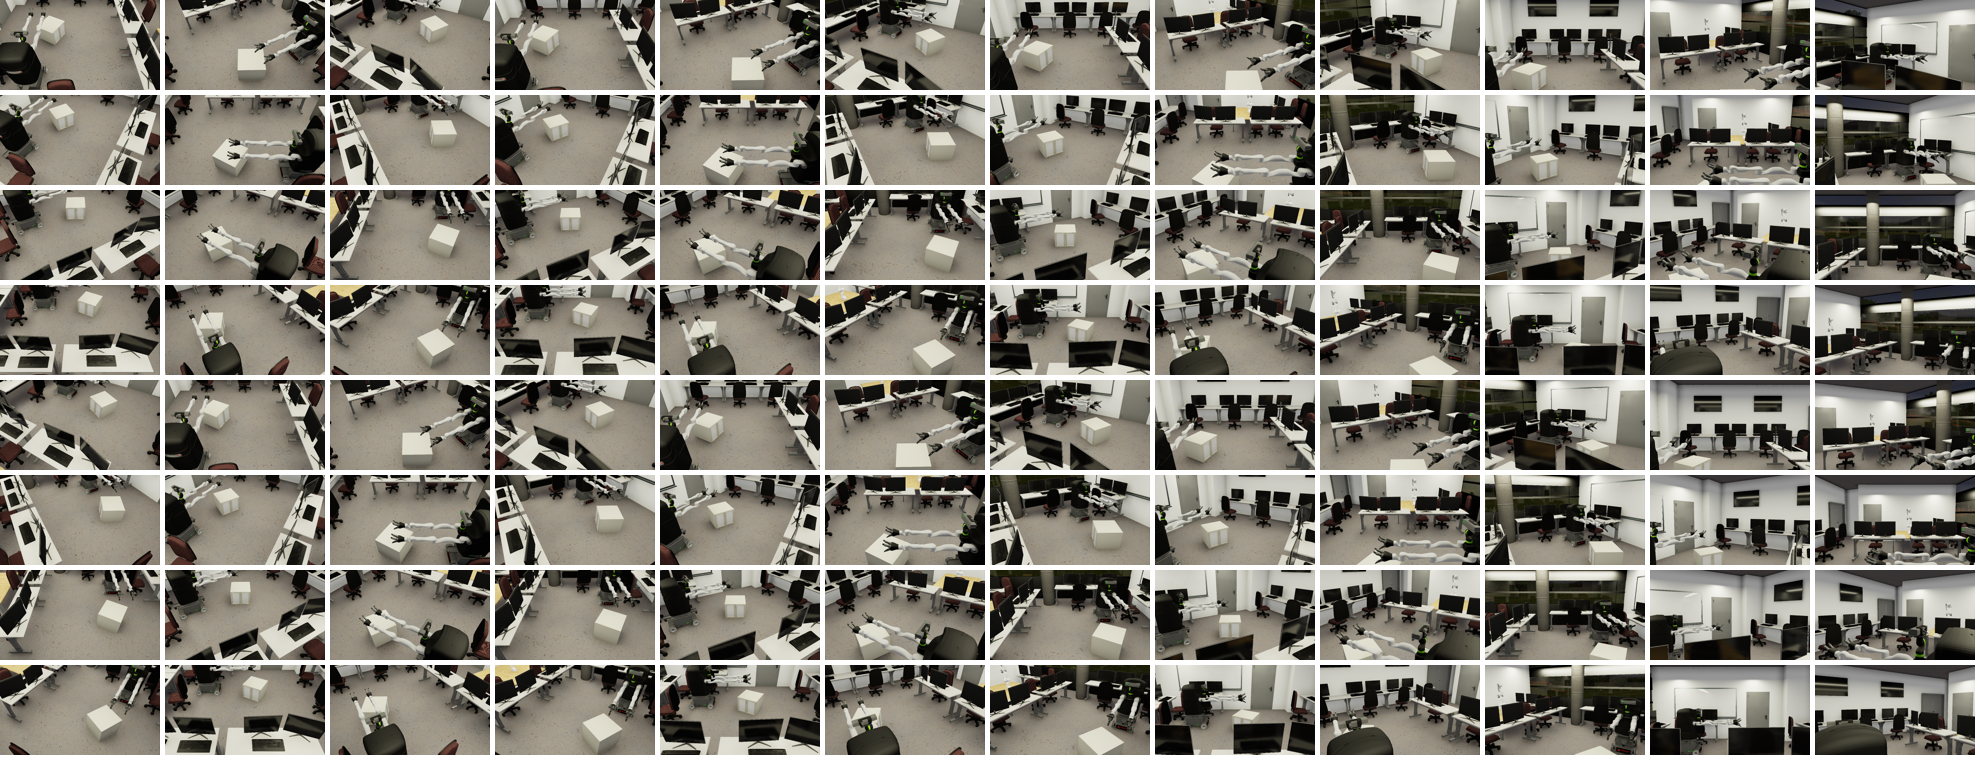

In [31]:
new_im

In [34]:
seg = np.load('/home/cem/Desktop/ov-workspace/data/ov-v3/seg/frame.0.seg.npy')

/tmp/ipykernel_5939/2896636096.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  plt.imshow(label2rgb(seg))


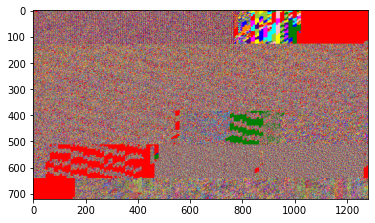

In [44]:
plt.imshow(label2rgb(seg))